In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as ma 
import numpy.random as rd
import sklearn.neural_network as nn #not used 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
from keras.layers import Flatten, Dense #not used 
from keras.applications.vgg16 import VGG16 #not used
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input #not used
from numpy import zeros, newaxis
import statistics
from statistics import mean

In [ ]:
#importation des valeurs
N=30

In [ ]:
def init (N): # we initialize an array randomly filled with -1; 0 and 1
  a=0
  T=np.zeros ((N,N)) # creation of a table of dimension 2 and size NxN
  for i in range (N):
    for j in range (N): 
      a= rd.randint (-1,2) # we fill this table with a random value -1, 0 or 1
      T[i,j]=a
  return(T)

T0 =init(30) 
#print(T0)

def listeT0 (N): # The purpose of this function is to create a list of K start tables. 
  L0=[]
  for k in range (1000): # Here the list will be composed of K = 1000 tables
    L0.append(init(N))  # These tables will conform to the previous init function
  return(L0)

L0= listeT0 (N) # We call this list of starting tables L0 (important for the continuation)
print(len(L0))



1000


In [ ]:
def evolution (T,N): # This function is the function corresponding to the rule and which makes a table evolve to the following stage 
  M=np.zeros ((N,N)) # creation of a table of dimension 2 and size N.N
  a=0
  b=0
  for i in range (N): # we go through the table with distinction of the cases to modify the boxes to carry out...
    for j in range (N): #... an evolution
      if i>0 and i<N-1 and j>0 and j<N-1: # center boxes
        a=T[i,j]+T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1]+T[i+1,j+1]+T[i+1,j-1]+T[i-1,j+1]+T[i-1,j-1]
      if i==0 and j!=0 and j!=N-1: # first line 
        a=T[i,j]+T[i+1,j]+T[i,j+1]+T[i,j-1]+T[i+1,j+1]+T[i+1,j-1]
      if i==N-1 and j!=0 and j!=N-1: # last line
        a=T[i,j]+T[i-1,j]+T[i,j+1]+T[i,j-1]+T[i-1,j+1]+T[i-1,j-1]
      if j==0 and i!=0 and i!=N-1: # first column
        a=T[i,j]+T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i+1,j+1]+T[i-1,j+1]
      if j==N-1 and i!=0 and i!=N-1: # last column
        a=T[i,j]+T[i+1,j]+T[i-1,j]+T[i,j-1]+T[i+1,j-1]+T[i-1,j-1]
      if i==0 and j==0: # angle 1 (top left)
        a=T[i,j]+T[i+1,j]+T[i,j+1]+T[i+1,j+1]
      if i==0 and j==N-1: # angle 2 (top right)
        a=T[i,j]+T[i+1,j]+T[i,j-1]+T[i+1,j-1]
      if i==N-1 and j==0: # angle 3 (bottom left)
        a=T[i,j]+T[i-1,j]+T[i,j+1]+T[i-1,j+1]
      if i==N-1 and j==N-1: # angle 4 (bottom right)
        a=T[i,j]+T[i-1,j]+T[i,j-1]+T[i-1,j-1]
      if a==0: # simple ...   
        b=0
      elif a<0:            # ... representaion ...
        b=-1
      elif a>0:                                   # ... of the instructions
        b=1
      M[i,j]=b   # we modify the value of the cell according to the value of the sum
  return (M)

M0= evolution (T0,30)
print (T0)
print (M0)

def listeT2 (L0,N): # we create the list of tables having undergone a single evolution from the list L0.
  L2=[]
  for k in L0:
    L2.append(evolution(k,N))
  return (L2)

L2 = listeT2 (L0,30) # On appelle L2 cette liste de tableau de dépar (important pour la suite)
#print (L2)



[[-1.  0.  0. -1.  1. -1.  1.  1.  1.  1.  0.  1.  0.  0. -1.  0.  1. -1.
   1. -1.  0.  1.  0.  1.  0. -1.  1.  0.  0. -1.]
 [-1.  1. -1.  0.  0.  0.  0.  0.  1.  0.  0. -1. -1.  0.  1.  1. -1.  1.
  -1.  1.  1.  1.  0.  1. -1.  1.  0.  1.  0.  1.]
 [ 1.  1.  1.  0. -1.  1.  1.  0.  0.  0.  0. -1.  1. -1.  0.  0.  0.  0.
  -1. -1. -1.  1.  1.  0.  1.  0.  1. -1.  1. -1.]
 [-1. -1.  1. -1. -1.  0. -1. -1.  1.  0. -1. -1. -1.  1. -1.  0. -1.  0.
   0. -1. -1.  0.  0.  0.  1. -1.  0.  1. -1.  1.]
 [ 0. -1.  0.  1.  0.  1. -1. -1.  1.  0. -1.  0.  1. -1.  0. -1. -1.  1.
   0. -1.  0. -1. -1.  1.  1. -1. -1. -1. -1. -1.]
 [ 0.  1. -1.  0.  1.  0.  1.  0.  1. -1.  0.  1. -1.  0. -1. -1.  0. -1.
   1.  0.  1. -1.  0.  1. -1.  1.  1.  1. -1. -1.]
 [ 1. -1.  0.  0.  0. -1.  0.  0.  1.  1.  1. -1.  0.  0.  0.  1.  1.  0.
   1. -1.  1.  0.  0. -1. -1.  0.  1.  1. -1.  1.]
 [ 0.  1. -1.  1.  1.  0.  0. -1.  0.  1.  1.  0.  1. -1.  1.  0.  0.  0.
  -1.  0.  0.  0.  0.  0. -1.  1. -1.  0.  0. -1.]


In [ ]:
def fonction (T,N): # We make the table evolve until the final state
  T1= T
  a=0
  for i in range (10000): # the final state is reached each time well before 10000 evolutions
    T1= evolution (T,N)
    if (T==T1).all()== True: # we get out of the loop as soon as 2 evolutions in a row are identical (= the array will not evolve anymore)
      a=i
      break
    else: 
      T=T1
  return (T1) # we return the final table (we see that the result converges all the time)

T2= fonction (T0,30)
#print (T0)
#print (T2)


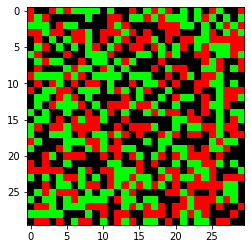

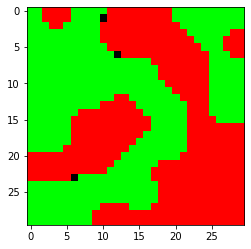

In [ ]:
def MtoIm(M,N):
  im=np.zeros ((N,N,3))
  for x in range (N):
    for y in range (N):
      if M[x][y]==-1:
        im[x,y,:]=[1,0,0]
      elif M[x,y]==0:
        im[x,y,:]= [0,0,0]
      elif M[x,y]==1:
        im[x,y,:]=[0,1,0]
  return (im)

im = MtoIm(T0,30)    # we display the tables with the color code (initial state/end state)
plt.imshow(im)
plt.show()

im2 = MtoIm(T2,30)
plt.imshow(im2)
plt.show()


In [ ]:
def shapem(L0,L2):# The purpose of this function is to transform the starting list and the evolved list into arrays of compatible dimensions
  L1=[]
  L4=[]
  for k in L0:
    k=k.reshape((N,N,1)) # We transform all the tables, then of dimension 2, of the two lists into tables of dimension 3
    L1.append(k)
  for i in L2:
    i=i.reshape((N,N,1))
    L4.append(i)
  L1=np.stack(L1) # with the stack function we have L1.shape =(1000, 30, 30, 1)
  L4=np.stack(L4)
  return (L1,L4)

L1,L4=shapem (L0,L2) # L1 and L4 are the compatible versions of L0 and L2 with Conv2D
print (L1.shape)
print (L1[24].shape)



(1000, 30, 30, 1)
(30, 30, 1)


In [ ]:
rnvide = Sequential() # We create our neural network
Depay=Conv2D(1, (3, 3), input_shape=(N, N, 1) , padding='same', activation='tanh') # a convolution with 1 filter of dimension 3.3
rnvide.add(Depay)

#we train our neural network with tables having undergone 1 evolution

rnvide.compile(loss='mse', optimizer='adadelta', metrics=['accuracy'])
rnvide.fit(x=L1, y=L4, batch_size=64, epochs=100, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)


Weight=np.zeros((3,3)) # we get the filter weights of our convolution
for i in range (3):
  for j in range (3):
    Weight [i][j]=float (Depay.get_weights()[0][i][j][0])
print (Weight)

Epoch 1/100
1000/1000 [==============================] - 0s 147us/step - loss: 1.1300 - acc: 0.3024
Epoch 2/100
1000/1000 [==============================] - 0s 51us/step - loss: 1.0719 - acc: 0.3211
Epoch 3/100
1000/1000 [==============================] - 0s 54us/step - loss: 1.0156 - acc: 0.3390
Epoch 4/100
1000/1000 [==============================] - 0s 46us/step - loss: 0.9614 - acc: 0.3565
Epoch 5/100
1000/1000 [==============================] - 0s 50us/step - loss: 0.9091 - acc: 0.3741
Epoch 6/100
1000/1000 [==============================] - 0s 46us/step - loss: 0.8586 - acc: 0.3906
Epoch 7/100
1000/1000 [==============================] - 0s 43us/step - loss: 0.8097 - acc: 0.4067
Epoch 8/100
1000/1000 [==============================] - 0s 46us/step - loss: 0.7622 - acc: 0.4228
Epoch 9/100
1000/1000 [==============================] - 0s 43us/step - loss: 0.7158 - acc: 0.4391
Epoch 10/100
1000/1000 [==============================] - 0s 47us/step - loss: 0.6705 - acc: 0.4539
Epoch 11

In [ ]:
def listeT25 (N):
  L0=[]
  for k in range (3):
    L0.append(init(N))
  return(L0)

L25=listeT25 (N)
#print (L25)

L26 = listeT2 (L25,30)

L27,L28=shapem (L25,L26) # L27 and L28 simply serve as a master list to test the prediction

print (L27.shape)



(3, 30, 30, 1)


(30, 30, 1)
0.9875464
1.0


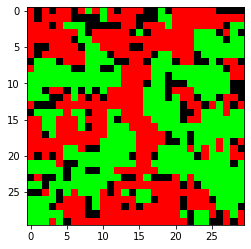

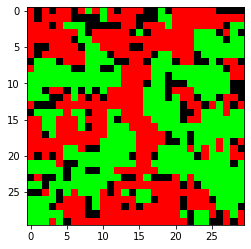

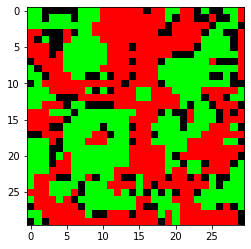

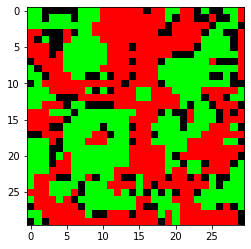

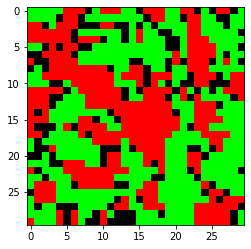

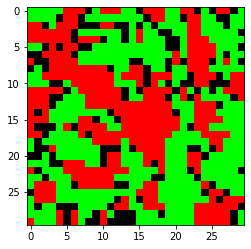

In [ ]:
H=rnvide.predict(L27, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
# We call H the prediction of a table according to the trained network above

print (H[1].shape)
print (H[1][2][2][0])

H1=np.around(H) # We round the values of H to be compatible with the game and the display

print (H1[1][2][2][0])
 
for k in range (3): # we test the neural network by visually comparing the prediction of the evolution 
  im30 = MtoIm(L28[k],30)  # and the real evolution
  plt.imshow(im30)
  plt.show()

  im31 = MtoIm(H1[k],30)
  plt.imshow(im31)
  plt.show()

In [ ]:
def fonction (T,N): # We make the table evolve until the final state
  T1= T
  a=0
  for i in range (10000): # the final state is reached each time well before 10000 evolutions
    T1= evolution (T,N)
    if (T==T1).all()== True: # we get out of the loop as soon as 2 evolutions in a row are identical (= the array will not evolve anymore)
      a=i
      break
    else: 
      T=T1
  return (T1) # we send back the final table 

def listeT20 (L0,N):  # we create an array list in the final state from L0
  L20=[]
  for k in L0:
    L20.append(fonction(k,N))
  return (L20)

L20= listeT20 (L0, N) # L20 corresponds to the end list of L0

L1,L5=shapem (L0,L20) # L1 and L5 are the compatible versions of L0 and L20 with Conv2D

In [ ]:
rnvideraté = Sequential() # We create our first neural network
Depay=Conv2D(1, (3, 3), input_shape=(N, N, 1) , padding='same', activation='tanh') # a convolution with 1 filter of dimension 3.3
rnvideraté.add(Depay)

# we train our neural network with tables having undergone 1 evolution

rnvideraté.compile(loss='mse', optimizer='adadelta', metrics=['accuracy'])
rnvideraté.fit(x=L1, y=L5, batch_size=64, epochs=100, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)

Epoch 1/100
1000/1000 [==============================] - 0s 309us/step - loss: 1.2869 - acc: 0.2594
Epoch 2/100
1000/1000 [==============================] - 0s 63us/step - loss: 1.2434 - acc: 0.2664
Epoch 3/100
1000/1000 [==============================] - 0s 57us/step - loss: 1.2001 - acc: 0.2707
Epoch 4/100
1000/1000 [==============================] - 0s 48us/step - loss: 1.1573 - acc: 0.2729
Epoch 5/100
1000/1000 [==============================] - 0s 55us/step - loss: 1.1151 - acc: 0.2756
Epoch 6/100
1000/1000 [==============================] - 0s 51us/step - loss: 1.0736 - acc: 0.2771
Epoch 7/100
1000/1000 [==============================] - 0s 50us/step - loss: 1.0330 - acc: 0.2774
Epoch 8/100
1000/1000 [==============================] - 0s 49us/step - loss: 0.9934 - acc: 0.2767
Epoch 9/100
1000/1000 [==============================] - 0s 53us/step - loss: 0.9553 - acc: 0.2749
Epoch 10/100
1000/1000 [==============================] - 0s 54us/step - loss: 0.9191 - acc: 0.2725
Epoch 11

In [ ]:
def fonction2 (T,N): # the function returns the number of changes before the table is stabilized  
  T1= T
  a=0
  for i in range (1000):
    T1= evolution (T,N)
    if (T==T1).all()== True:
      a=i
      break
    else: 
      T=T1
  return (a) 

T1000= fonction2(T0,N)
print (T1000)

def listeT1000 (L0,N): # This function returns the list of the devolution number before the stabilization of the starting tables
  L1000=[]
  for k in L0:
    L1000.append(fonction2(k,N))
  return (L1000) # This list will allow us to deduce an optimal convolution number

L1000=listeT1000 (L0,N)



21


In [ ]:
z = max(L1000)
y= mean (L1000)
print (z)
print (y)
x= int(y) # x corresponds to the average of the number of table evolutions 
print (x)

36
15.138
15


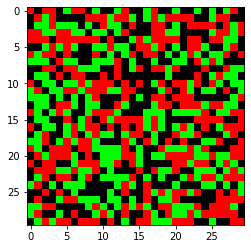

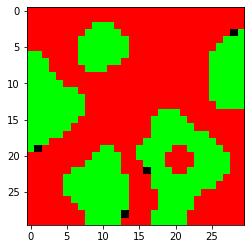

In [ ]:
T20=L0[20]
T21=L20[20]

im3 = MtoIm(T20,30) # we compare a starting table and an ending table
plt.imshow(im3)
plt.show()

im4 = MtoIm(T21,30)
plt.imshow(im4)
plt.show()

In [ ]:
rnvide2= Sequential() # We create a new neural network
rnvide2.add(Conv2D(1, (3, 3), input_shape=(N, N, 1) , padding='same', activation='tanh')) # First convolution 
for k in range (x): # We add x convolutions
  rnvide2.add(Conv2D(1, (3, 3), padding='same', activation='tanh'))

# we train the neural network with arrays in their initial and final states

rnvide2.compile(loss='mse', optimizer='adadelta', metrics=['accuracy'])
rnvide2.fit(x=L1, y=L5, batch_size=64, epochs=300, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)


Epoch 1/300
1000/1000 [==============================] - 1s 996us/step - loss: 1.0023 - acc: 0.0042
Epoch 2/300
1000/1000 [==============================] - 0s 176us/step - loss: 0.9971 - acc: 0.0042
Epoch 3/300
1000/1000 [==============================] - 0s 171us/step - loss: 0.9954 - acc: 0.0042
Epoch 4/300
1000/1000 [==============================] - 0s 188us/step - loss: 0.9933 - acc: 0.0042
Epoch 5/300
1000/1000 [==============================] - 0s 183us/step - loss: 0.9572 - acc: 0.0161
Epoch 6/300
1000/1000 [==============================] - 0s 176us/step - loss: 0.5234 - acc: 0.5268
Epoch 7/300
1000/1000 [==============================] - 0s 169us/step - loss: 0.3417 - acc: 0.7523
Epoch 8/300
1000/1000 [==============================] - 0s 175us/step - loss: 0.3023 - acc: 0.7850
Epoch 9/300
1000/1000 [==============================] - 0s 174us/step - loss: 0.2734 - acc: 0.8009
Epoch 10/300
1000/1000 [==============================] - 0s 180us/step - loss: 0.2523 - acc: 0.8120

670


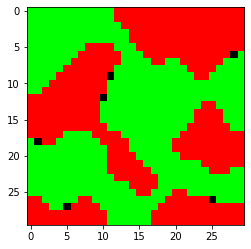

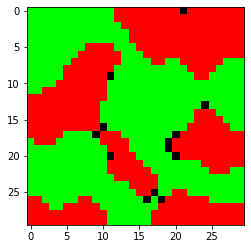

In [ ]:
H2=rnvide2.predict(L1, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

H3=np.around(H2) # H3 correspond à la prédiction de L1

# we test the neural network by visually comparing the prediction and the real final state

t=rd.randint (0,1001)
print(t)
im34 = MtoIm(L5[t],30) # we visually compare the arrival list and the prediction according to the neural network
plt.imshow(im34) 
plt.show()

im35 = MtoIm(H3[t],30)
plt.imshow(im35)
plt.show()

In [ ]:
def evolution2 (T,N): # we rewrite the evolution with the new rules
  M=np.zeros ((N,N))
  a=0
  b=0
  for i in range (N):
    for j in range (N):
      if i>0 and i<N-1 and j>0 and j<N-1:
        a=T[i,j]+T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1]+T[i+1,j+1]+T[i+1,j-1]+T[i-1,j+1]+T[i-1,j-1]
      if i==0 and j!=0 and j!=N-1:
        a=T[i,j]+T[i+1,j]+T[i,j+1]+T[i,j-1]+T[i+1,j+1]+T[i+1,j-1]
      if i==N-1 and j!=0 and j!=N-1:
        a=T[i,j]+T[i-1,j]+T[i,j+1]+T[i,j-1]+T[i-1,j+1]+T[i-1,j-1]
      if j==0 and i!=0 and i!=N-1:
        a=T[i,j]+T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i+1,j+1]+T[i-1,j+1]
      if j==N-1 and i!=0 and i!=N-1:
        a=T[i,j]+T[i+1,j]+T[i-1,j]+T[i,j-1]+T[i+1,j-1]+T[i-1,j-1]
      if i==0 and j==0:
        a=T[i,j]+T[i+1,j]+T[i,j+1]+T[i+1,j+1]
      if i==0 and j==N-1:
        a=T[i,j]+T[i+1,j]+T[i,j-1]+T[i+1,j-1]
      if i==N-1 and j==0:
        a=T[i,j]+T[i-1,j]+T[i,j+1]+T[i-1,j+1]
      if i==N-1 and j==N-1:
        a=T[i,j]+T[i-1,j]+T[i,j-1]+T[i-1,j-1]
      if a==0:
        b=0
      elif a<0 and T[i,j]!=1: # we have to change some conditions
        b=-1
      elif a<0 and T[i,j]==1: # we forbid the transformation from 1 to -1
        b=0
      elif a>0 and T[i,j]!=-1:
        b=1
      elif a>0 and T[i,j]==-1:# # we forbid the transformation from -1 to 1
        b=0
      M[i,j]=b
  return (M)

M16= evolution2 (T0,30)
print (T0)
print (M16)

[[-1.  0.  0. -1.  1. -1.  1.  1.  1.  1.  0.  1.  0.  0. -1.  0.  1. -1.
   1. -1.  0.  1.  0.  1.  0. -1.  1.  0.  0. -1.]
 [-1.  1. -1.  0.  0.  0.  0.  0.  1.  0.  0. -1. -1.  0.  1.  1. -1.  1.
  -1.  1.  1.  1.  0.  1. -1.  1.  0.  1.  0.  1.]
 [ 1.  1.  1.  0. -1.  1.  1.  0.  0.  0.  0. -1.  1. -1.  0.  0.  0.  0.
  -1. -1. -1.  1.  1.  0.  1.  0.  1. -1.  1. -1.]
 [-1. -1.  1. -1. -1.  0. -1. -1.  1.  0. -1. -1. -1.  1. -1.  0. -1.  0.
   0. -1. -1.  0.  0.  0.  1. -1.  0.  1. -1.  1.]
 [ 0. -1.  0.  1.  0.  1. -1. -1.  1.  0. -1.  0.  1. -1.  0. -1. -1.  1.
   0. -1.  0. -1. -1.  1.  1. -1. -1. -1. -1. -1.]
 [ 0.  1. -1.  0.  1.  0.  1.  0.  1. -1.  0.  1. -1.  0. -1. -1.  0. -1.
   1.  0.  1. -1.  0.  1. -1.  1.  1.  1. -1. -1.]
 [ 1. -1.  0.  0.  0. -1.  0.  0.  1.  1.  1. -1.  0.  0.  0.  1.  1.  0.
   1. -1.  1.  0.  0. -1. -1.  0.  1.  1. -1.  1.]
 [ 0.  1. -1.  1.  1.  0.  0. -1.  0.  1.  1.  0.  1. -1.  1.  0.  0.  0.
  -1.  0.  0.  0.  0.  0. -1.  1. -1.  0.  0. -1.]


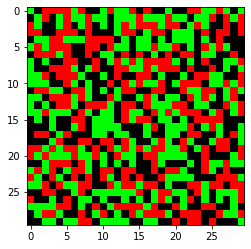

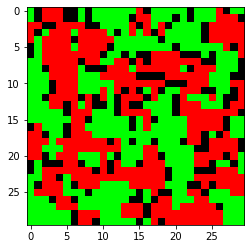

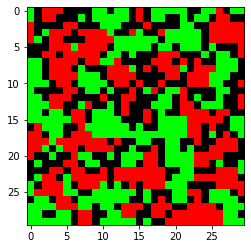

In [ ]:
im = MtoIm(T0,30) # we visually compare the differences between the two rules
plt.imshow(im)
plt.show()

im11 = MtoIm(M0,30)
plt.imshow(im11)
plt.show()

im16 = MtoIm(M16,30)
plt.imshow(im16)
plt.show()


In [ ]:
L0= listeT0 (30)

def listeT200 (L0,N): # we create a list of arrays having undergone an evolution from the list L0 according to the new rule
  L200=[]           
  for k in L0:
    L200.append(evolution2(k,N))
  return (L200)

L200 = listeT200 (L0,30) # L200 corresponds to the end list of L0 according to the new rule



In [ ]:
L1,L40=shapem (L0,L200) # L1 et L40 sont les versions compatibles de L0 et L200 avec Conv2D

print (L1.shape)
print(L40.shape)

(1000, 30, 30, 1)
(1000, 30, 30, 1)


In [ ]:

rnvide3 = Sequential() # We recreate our new neural network
Depay=Conv2D(1, (3, 3), input_shape=(N, N, 1) , padding='same', activation='tanh')
rnvide3.add(Depay)


rnvide3.compile(loss='mse', optimizer='adadelta', metrics=['accuracy']) 
rnvide3.fit(x=L1, y=L40, batch_size=64, epochs=68, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)


Epoch 1/68
1000/1000 [==============================] - 0s 220us/step - loss: 0.8035 - acc: 0.3560
Epoch 2/68
1000/1000 [==============================] - 0s 50us/step - loss: 0.7446 - acc: 0.3718
Epoch 3/68
1000/1000 [==============================] - 0s 49us/step - loss: 0.6857 - acc: 0.3874
Epoch 4/68
1000/1000 [==============================] - 0s 44us/step - loss: 0.6280 - acc: 0.4038
Epoch 5/68
1000/1000 [==============================] - 0s 56us/step - loss: 0.5723 - acc: 0.4192
Epoch 6/68
1000/1000 [==============================] - 0s 46us/step - loss: 0.5203 - acc: 0.4347
Epoch 7/68
1000/1000 [==============================] - 0s 53us/step - loss: 0.4729 - acc: 0.4504
Epoch 8/68
1000/1000 [==============================] - 0s 52us/step - loss: 0.4310 - acc: 0.4665
Epoch 9/68
1000/1000 [==============================] - 0s 54us/step - loss: 0.3945 - acc: 0.4837
Epoch 10/68
1000/1000 [==============================] - 0s 45us/step - loss: 0.3630 - acc: 0.5020
Epoch 11/68
1000/1

In [ ]:
def fonction3 (T,N): # This function makes the table evolve to the final state with the new rule
  T1= T
  a=0
  for i in range (10000):
    T1= evolution2 (T,N)
    if (T==T1).all()== True:
      a=i
      break
    else: 
      T=T1
  return (T1)

def fonction4 (T,N):# the function returns the number of evolutions before the table is stabilized with the new rule
  T1= T
  a=0
  for i in range (1000):
    T1= evolution2 (T,N)
    if (T==T1).all()== True:
      a=i
      break
    else: 
      T=T1
  return (a)

T10000= fonction4(T0,N)
print (T10000)

def listeT10000 (L0,N): # This function returns the list of the evolution number of each array before stabilization
  L10000=[]
  for k in L0:
    L10000.append(fonction4(k,N))
  return (L10000)

L10000=listeT10000 (L0,N)

m = max(L10000)     
n= mean (L10000) 
print (m)
print (n)
o= int(n) # o is the average number of evolutions
print (o)



16
44
17.56
17


In [ ]:
def listeT2000 (L0,N):
  L2000=[]
  for k in L0:
    L2000.append(fonction3(k,N))
  return (L2000)

L2000= listeT2000 (L0, N) # L2000 is the table list in the final state with the new rule

L1,L50=shapem (L0,L2000) # L1 and L50 are the compatible versions of L0 and L2000 with Conv2D

In [ ]:
rnvide4= Sequential() # We create our second neural network
rnvide4.add(Conv2D(1, (3, 3), input_shape=(N, N, 1) , padding='same', activation='tanh')) # First convolution
for k in range (o): # We add o convolutions
  rnvide4.add(Conv2D(1, (3, 3), padding='same', activation='tanh'))

rnvide4.compile(loss='mse', optimizer='adadelta', metrics=['accuracy'])
rnvide4.fit(x=L1, y=L50, batch_size=64, epochs=300, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)


Epoch 1/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0227 - acc: 0.0048
Epoch 2/300
1000/1000 [==============================] - 0s 189us/step - loss: 1.0019 - acc: 0.0044
Epoch 3/300
1000/1000 [==============================] - 0s 183us/step - loss: 0.9973 - acc: 0.0044
Epoch 4/300
1000/1000 [==============================] - 0s 186us/step - loss: 0.9963 - acc: 0.0044
Epoch 5/300
1000/1000 [==============================] - 0s 197us/step - loss: 0.9960 - acc: 0.0044
Epoch 6/300
1000/1000 [==============================] - 0s 177us/step - loss: 0.9958 - acc: 0.0044
Epoch 7/300
1000/1000 [==============================] - 0s 183us/step - loss: 0.9957 - acc: 0.0044
Epoch 8/300
1000/1000 [==============================] - 0s 183us/step - loss: 0.9957 - acc: 0.0044
Epoch 9/300
1000/1000 [==============================] - 0s 172us/step - loss: 0.9956 - acc: 0.0044
Epoch 10/300
1000/1000 [==============================] - 0s 195us/step - loss: 0.9956 - acc: 0.0044
E

644


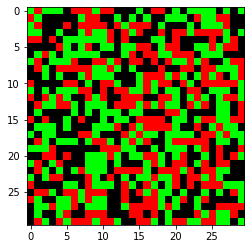

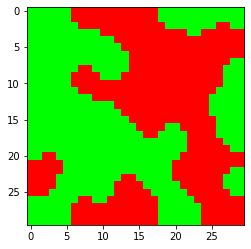

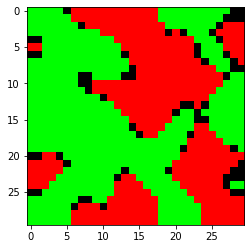

In [ ]:
H4=rnvide4.predict(L1, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

H5=np.around(H4) # H5 corresponds to the prediction of the evolution of L1 according to the new rule

t=rd.randint (0,1001)
print(t)

im330 = MtoIm(L1[t],30)
plt.imshow(im330)
plt.show()

im340 = MtoIm(L50[t],30)
plt.imshow(im340)
plt.show()

im3500 = MtoIm(H5[t],30)
plt.imshow(im3500)
plt.show()

In [ ]:
rnvide5= Sequential() # We create our final neural network
rnvide5.add(Conv2D(50, (3, 3), input_shape=(N, N, 1) , padding='same', activation='tanh')) # This time with 50 filters
for k in range (o-1): # We add o-1 convolutions to 50 filters each
  rnvide5.add(Conv2D(50, (3, 3), padding='same', activation='tanh')) 
rnvide5.add(Conv2D(1, (3, 3), padding='same', activation='tanh')) 
# the last convolution must have a unique filter to be of good dimension

rnvide5.compile(loss='mse', optimizer='adadelta', metrics=['accuracy'])
rnvide5.fit(x=L1, y=L50, batch_size=64, epochs=300, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)


Epoch 1/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8979 - acc: 0.6509
Epoch 2/300
1000/1000 [==============================] - 1s 800us/step - loss: 0.5134 - acc: 0.8241
Epoch 3/300
1000/1000 [==============================] - 1s 801us/step - loss: 0.4387 - acc: 0.8338
Epoch 4/300
1000/1000 [==============================] - 1s 800us/step - loss: 0.3785 - acc: 0.8393
Epoch 5/300
1000/1000 [==============================] - 1s 806us/step - loss: 0.3452 - acc: 0.8441
Epoch 6/300
1000/1000 [==============================] - 1s 809us/step - loss: 0.3274 - acc: 0.8441
Epoch 7/300
1000/1000 [==============================] - 1s 810us/step - loss: 0.2948 - acc: 0.8511
Epoch 8/300
1000/1000 [==============================] - 1s 805us/step - loss: 0.2910 - acc: 0.8487
Epoch 9/300
1000/1000 [==============================] - 1s 798us/step - loss: 0.2709 - acc: 0.8577
Epoch 10/300
1000/1000 [==============================] - 1s 804us/step - loss: 0.2648 - acc: 0.8563
E

812


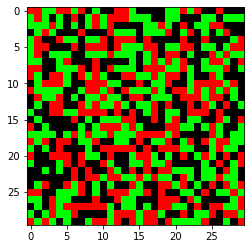

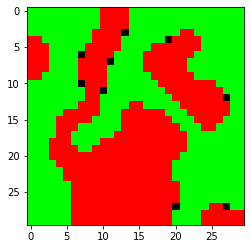

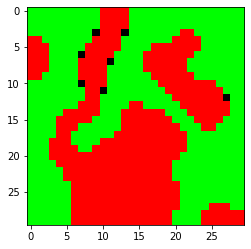

In [ ]:
H6=rnvide5.predict(L1, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

H7=np.around(H6) # work

t=rd.randint (0,1001)
print(t)

im3300 = MtoIm(L1[t],30) # We visually compare the precondition and the final result
plt.imshow(im3300)
plt.show()

im3400 = MtoIm(L50[t],30)
plt.imshow(im3400)
plt.show()

im35000 = MtoIm(H7[t],30)
plt.imshow(im35000)
plt.show()